### Data processing
* Missing data
* Feature enginering

### EDA
* Visualization
* Phân tích mô tả dữ liệu
    * Univariate analysis
        * C
        * dsd 
    * 



### Missing data
* Xóa bỏ
    * Loại bỏ dòng bị trùng
    * Loại bỏ dòng bị rỗng
* Filling
    * Scaler
    * Mean
    * Median
    * Mode
    * Interpolate

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

df.info()
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


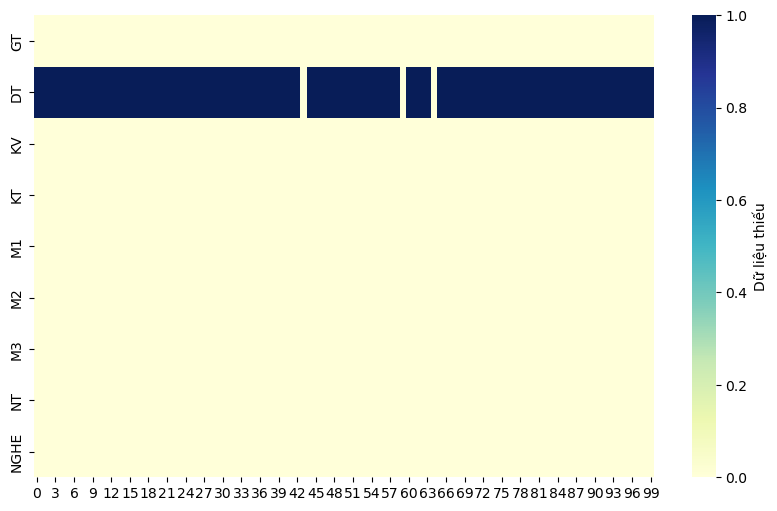

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

##### Fill dữ liệu trùng

In [ ]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

##### Tạo cột TBM

In [14]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333


##### Tạo cột XL

In [15]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL


##### Tạo dictionary

In [18]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1


##### Tạo cột điểm cộng `PLUS`

In [19]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0


# Bài tập về nhà
Tạo cột `MaxM` = gtri lớn nhất của (`M1`, `M2`, `M3`)

In [20]:
def maxM(array):
    return np.max(array)

df['MaxM'] = df[['M1','M2','M3']].apply(maxM, axis=1)
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS,MaxM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0,4.50
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0,6.00
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0,6.75
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0,5.25
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0,5.00


### Visualization

* Collumn
    * So sánh độ lớn
    * Ox, Oy
* Pie
    * Tỉ lệ phần trăm 
    * Toàn bộ 100%
    * Tỉ lệ % theo màu sắc
* Line
    * Sử dụng khi biểu diễn độ lớn dữ liệu có tính thứ tự   ***Theo thời gian***
    * Ox, Oy

Thống kê giới tính (cột cao hơn là giới tính nào)

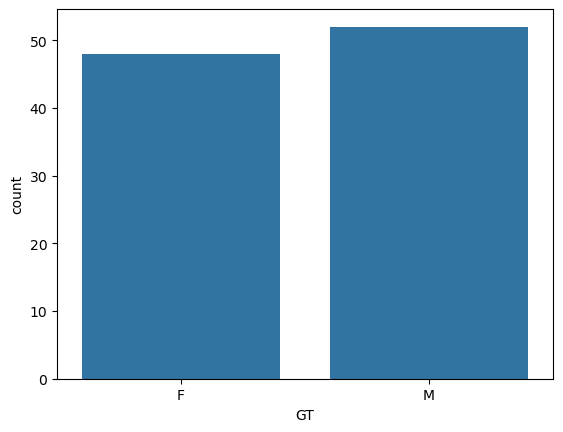

In [5]:
sns.countplot(x='GT', data=df)
plt.show()

Cột cao hơn khối thi nào

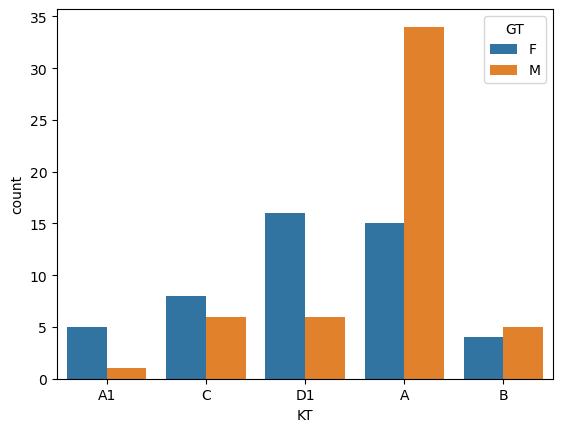

In [6]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

Sinh viên tự làm tương tự cho các nhóm 
biến định tính: (`KV`,`KT`)
-->Hãy cho biết khối `A` có sinh viên khu vực nào đăng ký nhiều nhất

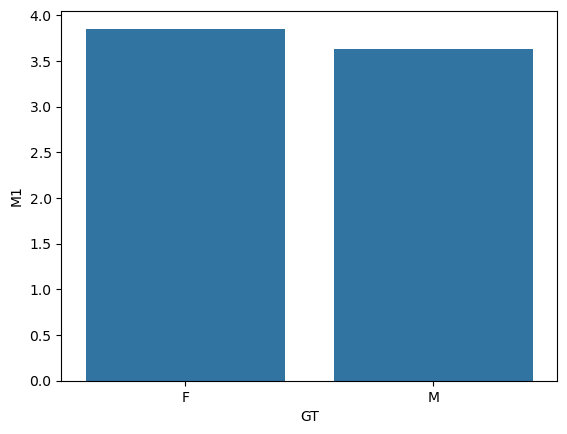

In [7]:
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()


Hãy so sánh trung bình điểm `M2` theo `NHOM`
-> Cho biết nhóm thi nào có điểm thi `M2` cao nhất

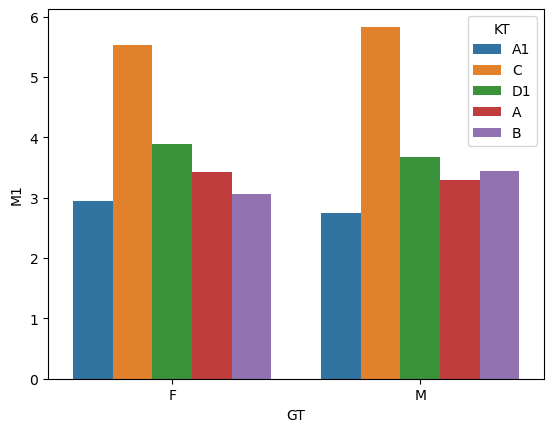

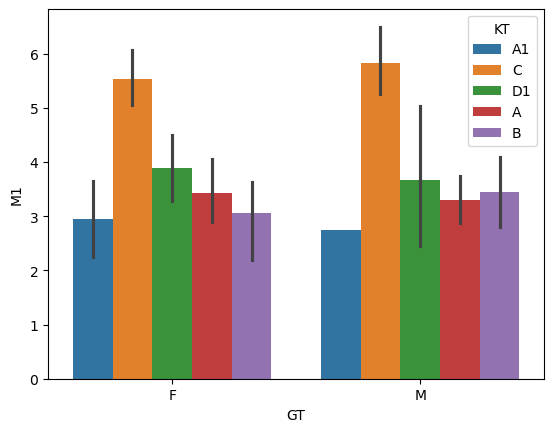

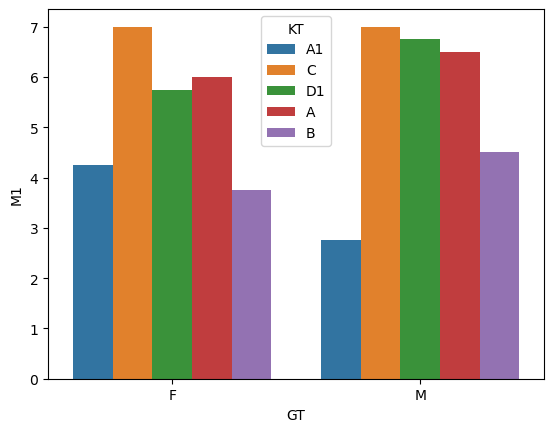

In [8]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

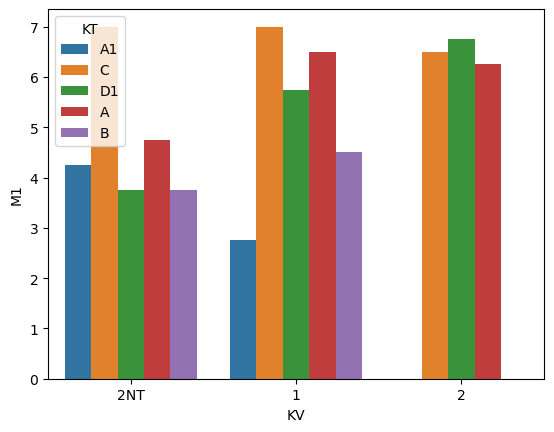

In [9]:
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

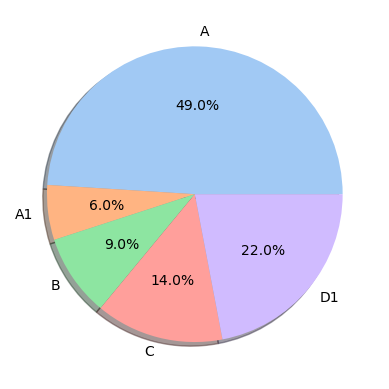

In [10]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

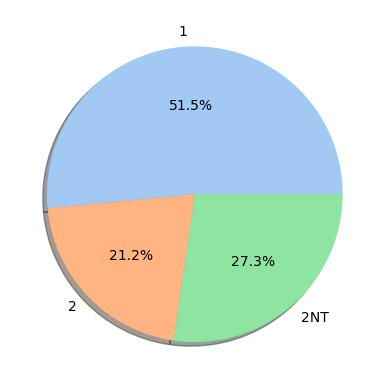

In [21]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

### Phân tích dữ liệu định lượng
* Univariate Analysis
    * Đại lượng đo lường mức độ tập trung
    
